In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

## Lets dig the data and clean it!!

In [4]:
# Load the dataset into a DataFrame
house_prices_data = pd.read_csv('house_prices_dataset.csv')

# Analyze the dataset
print("Shape of the dataset:", house_prices_data.shape)
print("\nColumns in the dataset:", house_prices_data.columns)
print("\nInfo about the dataset:")
house_prices_data.info()

Shape of the dataset: (500, 9)

Columns in the dataset: Index(['Location', 'Size_sqft', 'Bedrooms', 'Bathrooms', 'House_Age', 'Garage',
       'Pool', 'Distance_to_City_Center_miles', 'Price'],
      dtype='object')

Info about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Location                       500 non-null    object 
 1   Size_sqft                      500 non-null    int64  
 2   Bedrooms                       500 non-null    int64  
 3   Bathrooms                      500 non-null    int64  
 4   House_Age                      500 non-null    int64  
 5   Garage                         500 non-null    int64  
 6   Pool                           500 non-null    int64  
 7   Distance_to_City_Center_miles  500 non-null    float64
 8   Price                          500 non-null    flo

In [5]:
house_prices_data.describe()

,Size_sqft,Bedrooms,Bathrooms,House_Age,Garage,Pool,Distance_to_City_Center_miles,Price
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,5.000000e+02
mean,2971.950000,3.008000,2.458000,23.458000,0.702000,0.194000,15.200508,1.329449e+06
std,1169.733097,1.428291,1.114774,14.209435,0.457838,0.395825,8.373759,3.780628e+05
min,803.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.500343,5.558926e+05
25%,2005.000000,2.000000,1.000000,11.000000,0.000000,0.000000,7.903742,1.029014e+06
50%,2956.000000,3.000000,2.000000,23.000000,1.000000,0.000000,15.467201,1.336224e+06
75%,3980.500000,4.000000,3.000000,35.000000,1.000000,0.000000,22.237744,1.619568e+06
max,4988.000000,5.000000,4.000000,49.000000,1.000000,1.000000,29.916879,2.196013e+06


In [6]:
house_prices_data.isnull().sum()/len(house_prices_data) *100 #check for any null values

,0
Location,0.0
Size_sqft,0.0
Bedrooms,0.0
Bathrooms,0.0
House_Age,0.0
Garage,0.0
Pool,0.0
Distance_to_City_Center_miles,0.0
Price,0.0


In [7]:
house_prices_data.nunique()

,0
Location,5
Size_sqft,462
Bedrooms,5
Bathrooms,4
House_Age,50
Garage,2
Pool,2
Distance_to_City_Center_miles,500
Price,500


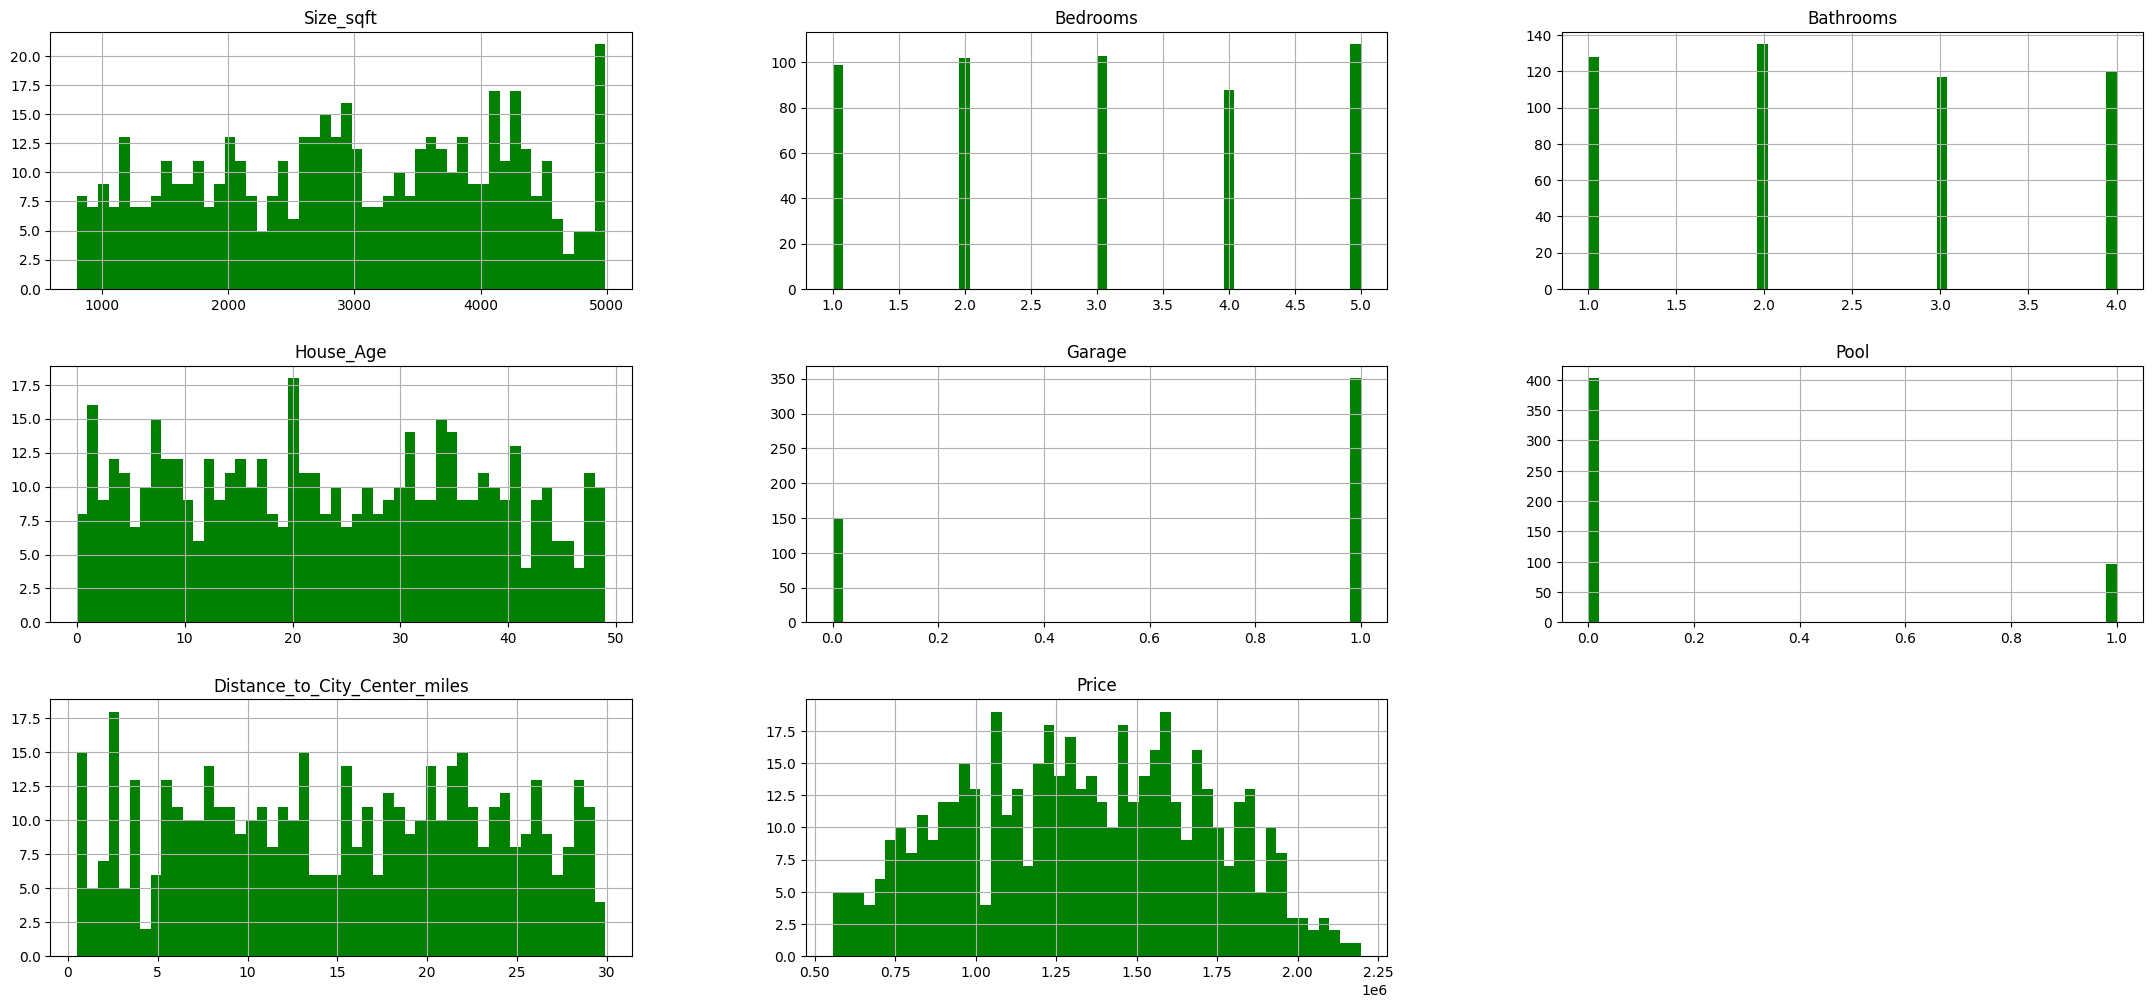

In [8]:
num_columns = len(house_prices_data.columns)
fig_width = num_columns * 3  # Adjust width based on the number of columns
fig_height = 12  # Fixed height
house_prices_data.hist(figsize=(fig_width, fig_height), bins=50, color='g')
plt.show()

In [9]:
for col in house_prices_data.select_dtypes(include=[np.number]).columns:
    Q1 = house_prices_data[col].quantile(0.25)
    Q3 = house_prices_data[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = house_prices_data[(house_prices_data[col] < (Q1 - 1.5 * IQR)) | (house_prices_data[col] > (Q3 + 1.5 * IQR))]
    print(f"Outliers in column '{col}':")
    print(outliers[[col]])
    print("\n")

Outliers in column 'Size_sqft':
Empty DataFrame
Columns: [Size_sqft]
Index: []


Outliers in column 'Bedrooms':
Empty DataFrame
Columns: [Bedrooms]
Index: []


Outliers in column 'Bathrooms':
Empty DataFrame
Columns: [Bathrooms]
Index: []


Outliers in column 'House_Age':
Empty DataFrame
Columns: [House_Age]
Index: []


Outliers in column 'Garage':
Empty DataFrame
Columns: [Garage]
Index: []


Outliers in column 'Pool':
     Pool
4       1
11      1
13      1
16      1
31      1
..    ...
465     1
480     1
485     1
495     1
496     1

[97 rows x 1 columns]


Outliers in column 'Distance_to_City_Center_miles':
Empty DataFrame
Columns: [Distance_to_City_Center_miles]
Index: []


Outliers in column 'Price':
Empty DataFrame
Columns: [Price]
Index: []




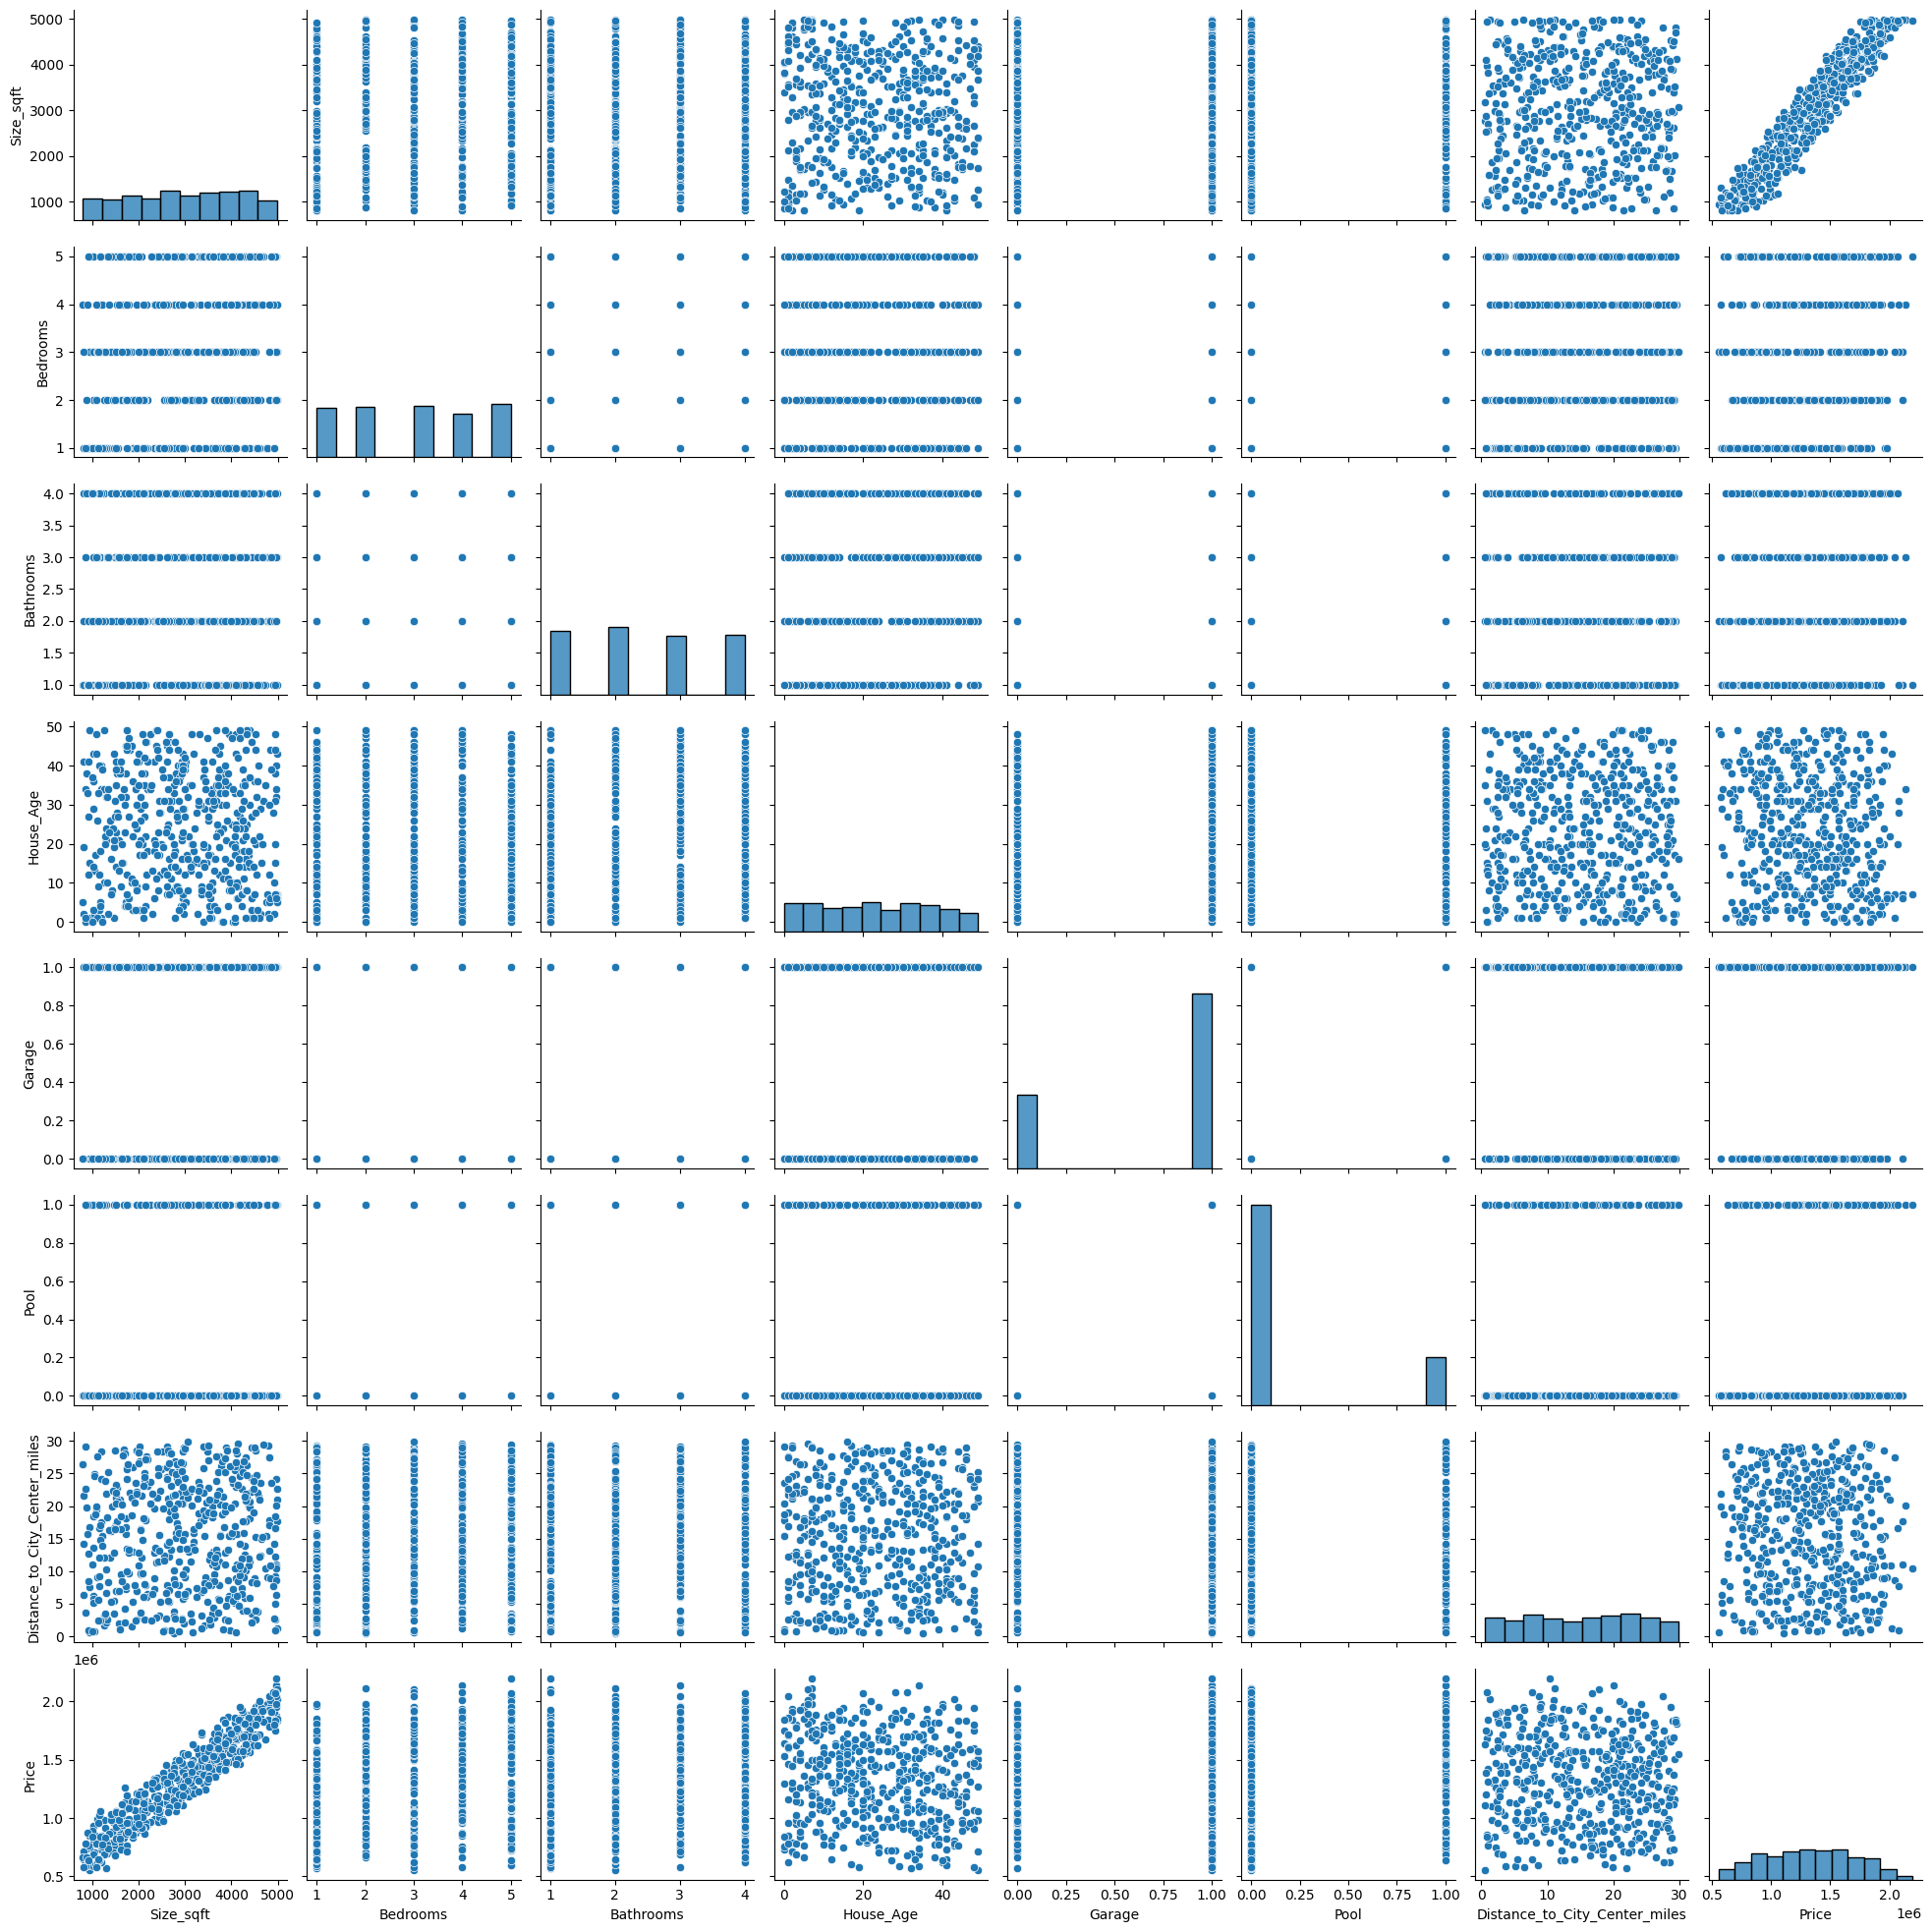

In [10]:
sns.pairplot(house_prices_data)

In [11]:
df = house_prices_data.iloc[:, 1:]
df.corr()

,Size_sqft,Bedrooms,Bathrooms,House_Age,Garage,Pool,Distance_to_City_Center_miles,Price
Size_sqft,1.000000,0.085322,0.001868,-0.033970,0.054844,-0.007376,0.024442,0.946903
Bedrooms,0.085322,1.000000,0.022867,-0.018350,0.040428,0.046875,0.021132,0.140904
Bathrooms,0.001868,0.022867,1.000000,0.116660,0.024509,0.029857,0.112239,0.062564
House_Age,-0.033970,-0.018350,0.116660,1.000000,0.058603,0.018376,0.000320,-0.122964
Garage,0.054844,0.040428,0.024509,0.058603,1.000000,-0.045272,0.004788,0.064441
Pool,-0.007376,0.046875,0.029857,0.018376,-0.045272,1.000000,0.005958,0.056630
Distance_to_City_Center_miles,0.024442,0.021132,0.112239,0.000320,0.004788,0.005958,1.000000,-0.052198
Price,0.946903,0.140904,0.062564,-0.122964,0.064441,0.056630,-0.052198,1.000000


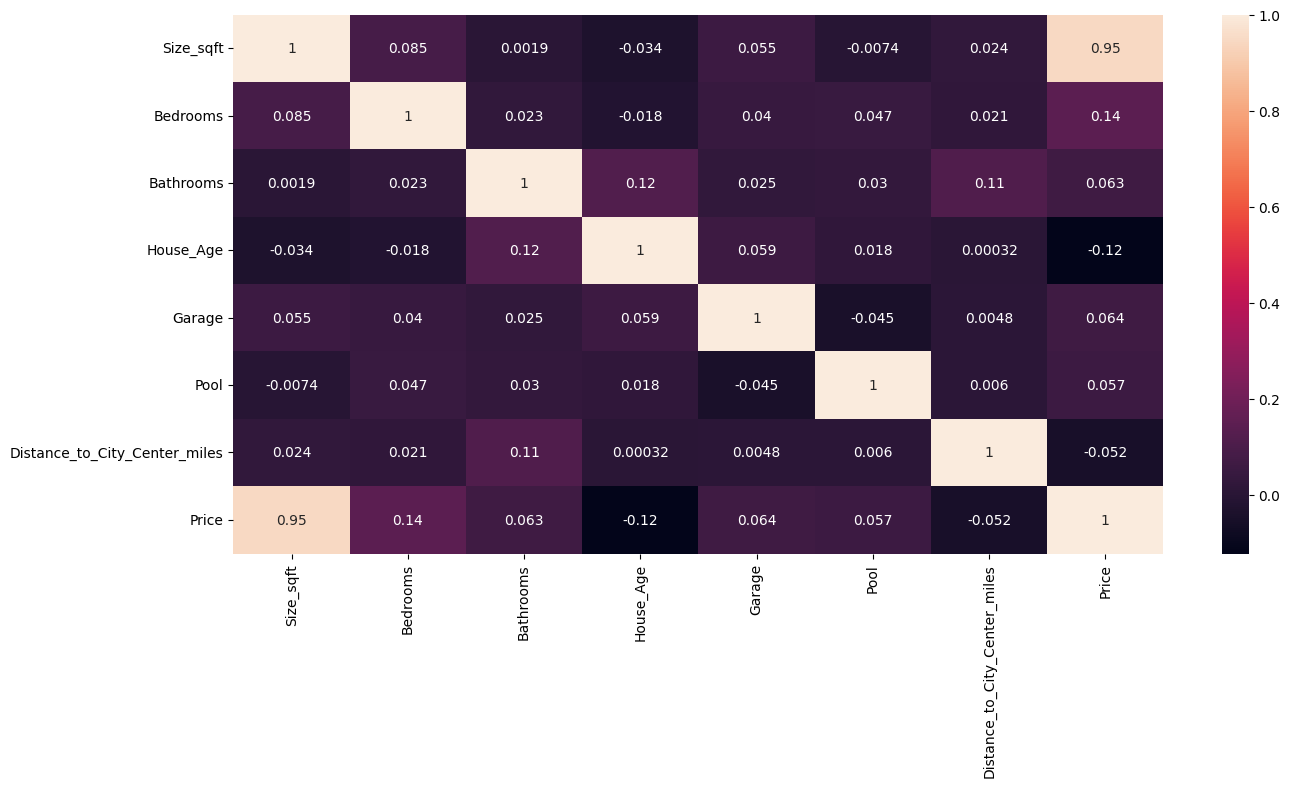

In [12]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [13]:
df.corr()['Price']

,Price
Size_sqft,0.946903
Bedrooms,0.140904
Bathrooms,0.062564
House_Age,-0.122964
Garage,0.064441
Pool,0.056630
Distance_to_City_Center_miles,-0.052198
Price,1.000000


In [14]:
X = df[[
    'Size_sqft',
    'Bedrooms',
    'Bathrooms',
    'House_Age',
    'Garage',
    'Pool',
    'Distance_to_City_Center_miles'
]]
Y = df['Price']

In [15]:
X.head()

,Size_sqft,Bedrooms,Bathrooms,House_Age,Garage,Pool,Distance_to_City_Center_miles
0,1395,3,1,26,1,0,12.077516
1,1528,4,2,28,1,0,22.750817
2,2165,4,4,46,1,0,27.593580
3,1498,5,3,27,1,0,28.552394
4,1195,5,4,34,1,1,17.525116


In [16]:
Y.head()

,Price
0,7.257565e+05
1,7.264075e+05
2,1.050788e+06
3,7.240178e+05
4,7.342087e+05


## Fitting Linear Regression

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Train Linear Regression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
# Use metrics appropriate for regression, such as Mean Squared Error (MSE) or R-squared

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 11219608887.51343
R-squared: 0.9178199755484865


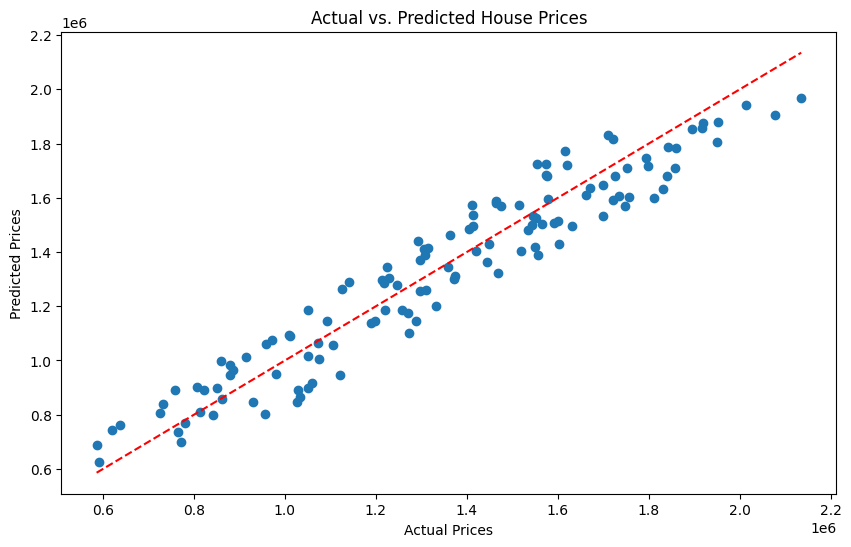

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Add a diagonal line
plt.show()


## Predicting using Neural Network

`Below is a simple feedforward neural network using Keras for a regression task. The model consists of three layers: an input layer with 64 neurons and ReLU activation, a hidden layer with 32 neurons and ReLU activation, and an output layer with a single neuron for predicting continuous values. The model is compiled using the Adam optimizer with a learning rate of 0.001 and Mean Squared Error (MSE) as the loss function. It is then trained on the scaled training data for 50 epochs with a batch size of 32, using 20% of the data for validation. Finally, predictions are made on the test set, and the Mean Squared Error is calculated to evaluate performance.`

In [19]:
model = Sequential([
    Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

y_pred_nn = model.predict(X_test_scaled)
mse_nn = mean_squared_error(y_test, y_pred_nn)
print(f"Mean Squared Error (Neural Network): {mse_nn}")

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 1971806666752.0000 - mae: 1350816.7500 - val_loss: 1970317164544.0000 - val_mae: 1354040.3750
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1904357670912.0000 - mae: 1328563.1250 - val_loss: 1970315853824.0000 - val_mae: 1354039.6250
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1868844761088.0000 - mae: 1314299.2500 - val_loss: 1970314018816.0000 - val_mae: 1354039.0000
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1914116112384.0000 - mae: 1332170.8750 - val_loss: 1970311790592.0000 - val_mae: 1354038.1250
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1920988610560.0000 - mae: 1332448.7500 - val_loss: 1970308907008.0000 - val_mae: 1354037.1250
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1942613786624.0000 - mae: 1341797.2500 - val_loss: 1970305499136.0000 - val_mae: 1354036.0000
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1852236759040.0000 - mae: 1312342.7

In [24]:
y_pred_nn[:5]

array([[1052.1294],
       [1831.3975],
       [1761.6289],
       [2088.5942],
       [1426.5299]], dtype=float32)

In [26]:
y_test[:5]

,Price
361,7.586408e+05
73,1.830406e+06
374,1.699715e+06
155,1.725103e+06
104,1.443916e+06


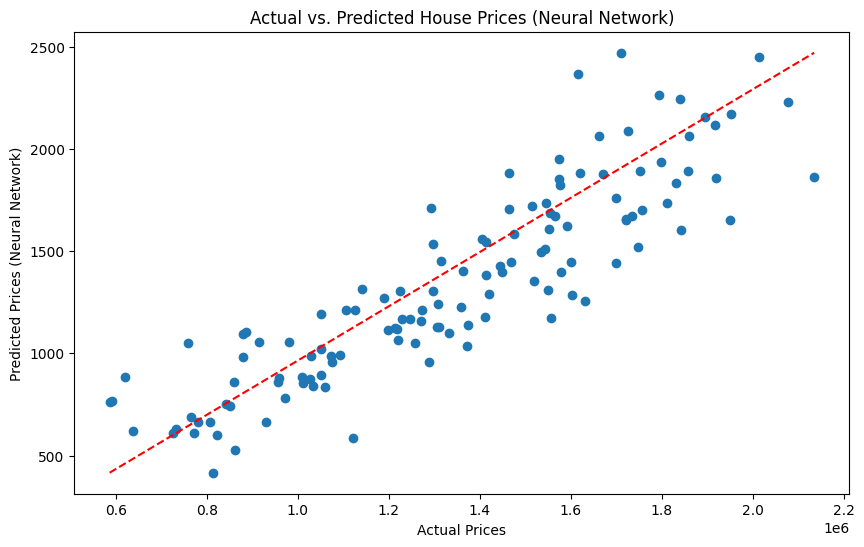

In [34]:

# Plot Actual vs. Predicted Prices for Neural Network
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_nn)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices (Neural Network)")
plt.title("Actual vs. Predicted House Prices (Neural Network)")
plt.plot([min(y_test), max(y_test)], [min(y_pred_nn), max(y_pred_nn)], color='red', linestyle='--')
#plt.plot([0,0], [2e6,2e6], color='red', linestyle='--')
plt.show()

## Lets try Random Forest Regressor

`Lets trains a Random Forest Regressor for regression. It initializes the model with a fixed random state for reproducibility, fits it on the scaled training data, makes predictions on the test set, and stores the predicted values`

Random Forest Regressor:
MSE: 14442460381.941332
RMSE: 120176.78803305292
R2 Score: 0.894213625516941


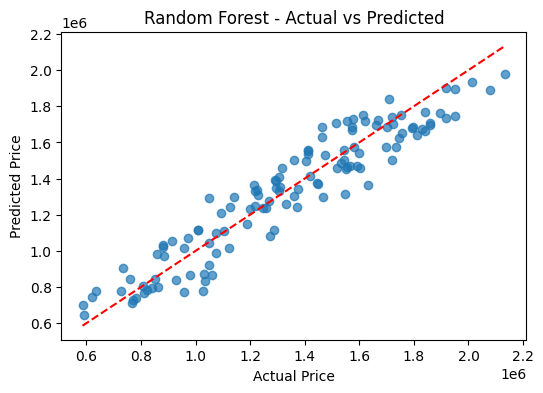

In [22]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)

# Evaluation
print("Random Forest Regressor:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2 Score:", r2_score(y_test, y_pred_rf))

# Plot
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest - Actual vs Predicted")
plt.show()

`Random forest seems to underperform as compared to linear regression but its giving better results than neural network!!`

## Last but not least Decision Tree


Decision Tree Regressor:
MSE: 22943389891.520653
RMSE: 151470.75589538945
R2 Score: 0.8319470525943039


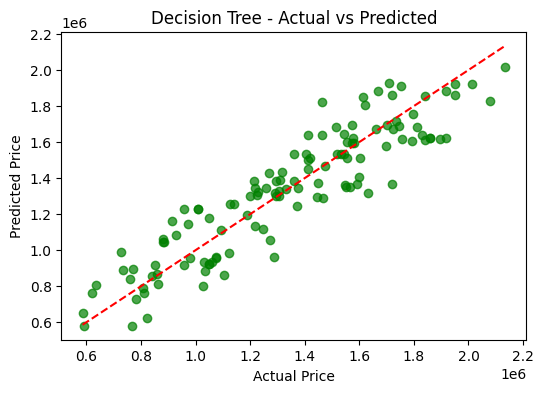

In [23]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

# Evaluation
print("\nDecision Tree Regressor:")
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))
print("R2 Score:", r2_score(y_test, y_pred_dt))

# Plot
plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred_dt, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Decision Tree - Actual vs Predicted")
plt.show()